# 🖼️ Image Classification with BreastMNIST
## A Practical Guide to Medical Image ML (90 minutes)

---

### 📋 Workshop Overview

Welcome! In this tutorial, you'll learn how to build **machine learning models for medical image classification**. We'll work with the BreastMNIST dataset and compare traditional ML methods with deep learning approaches.

### 🎯 What You'll Learn

1. **Data Exploration** (20 min) - Understanding medical image data
2. **Model Training** (50 min) - Building and comparing multiple models
3. **Model Evaluation** (20 min) - Analyzing performance metrics

---

### 📊 About Our Dataset

We're working with **BreastMNIST** - ultrasound images of breast tissue:
- 28x28 grayscale images
- Binary classification: Benign (0) vs Malignant (1)
- Real medical imaging data

**Goal**: Classify breast ultrasound images to aid in cancer diagnosis.

---

### ⚙️ Prerequisites Check

First, let's verify all required libraries are installed.

In [3]:
import sys

# Check required libraries and their versions
required_libs = {
    "medmnist": "3.0",
    "numpy": "1.24",
    "scikit-learn": "1.3",
    "matplotlib": "3.7",
    "seaborn": "0.12",
    "tensorflow": "2.13",
    "scipy": "1.10"
}

print("🔍 Checking installed libraries...\n")
print("=" * 70)

for lib_name, min_version in required_libs.items():
    try:
        if lib_name == "scikit-learn":
            import sklearn
            lib = sklearn
            actual_name = "sklearn"
        else:
            lib = __import__(lib_name)
            actual_name = lib_name
        
        installed_version = lib.__version__
        print(f"✓ {lib_name}: {installed_version} (required: >={min_version})")
    except ImportError:
        print(f"✗ {lib_name} is NOT installed. Please install it using:")
        print(f"   pip install {lib_name}>={min_version}")

print("\n✅ Library check complete!")

🔍 Checking installed libraries...

✓ medmnist: 3.0.2 (required: >=3.0)
✓ numpy: 2.3.4 (required: >=1.24)
✓ scikit-learn: 1.7.2 (required: >=1.3)
✓ matplotlib: 3.10.7 (required: >=3.7)
✓ seaborn: 0.13.2 (required: >=0.12)
✗ tensorflow is NOT installed. Please install it using:
   pip install tensorflow>=2.13
✓ scipy: 1.16.3 (required: >=1.10)

✅ Library check complete!


## 🔍 STEP 1: Data Exploration

Let's understand our medical image dataset before diving into modeling!

### 📥 Loading the Dataset

In [ ]:
from medmnist import BreastMNIST
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

print("📥 Loading BreastMNIST dataset...")
print("=" * 70)

# Load dataset
train_ds = BreastMNIST(split='train', download=True)
val_ds = BreastMNIST(split='val', download=True)
test_ds = BreastMNIST(split='test', download=True)

# Convert to numpy arrays
X_train = train_ds.imgs.reshape(len(train_ds), -1)
y_train = train_ds.labels.flatten()

X_val = val_ds.imgs.reshape(len(val_ds), -1)
y_val = val_ds.labels.flatten()

X_test = test_ds.imgs.reshape(len(test_ds), -1)
y_test = test_ds.labels.flatten()

print(f"\n✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Overview:")
print(f"   Training samples: {len(X_train)}")
print(f"   Validation samples: {len(X_val)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Image dimensions: 28x28 pixels")
print(f"   Flattened features: {X_train.shape[1]} pixels")
print(f"   Classes: 2 (0=Benign, 1=Malignant)")


### 🔄 Data Preparation for Traditional ML

For traditional ML models (Logistic Regression, Random Forest, etc.), we need to:
1. Flatten images from 28x28 to 784 features
2. Normalize pixel values using StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [ ]:
print("\n🔢 Data Shape After Normalization:")
print("=" * 70)
print(f"   Training set:   {X_train.shape[0]:>5} samples × {X_train.shape[1]:>3} features")
print(f"   Validation set: {X_val.shape[0]:>5} samples × {X_val.shape[1]:>3} features")
print(f"   Test set:       {X_test.shape[0]:>5} samples × {X_test.shape[1]:>3} features")
print(f"\n✅ Data normalized and ready for traditional ML models!")

### 📊 Class Distribution Analysis

Let's check if our dataset is balanced between benign and malignant cases.

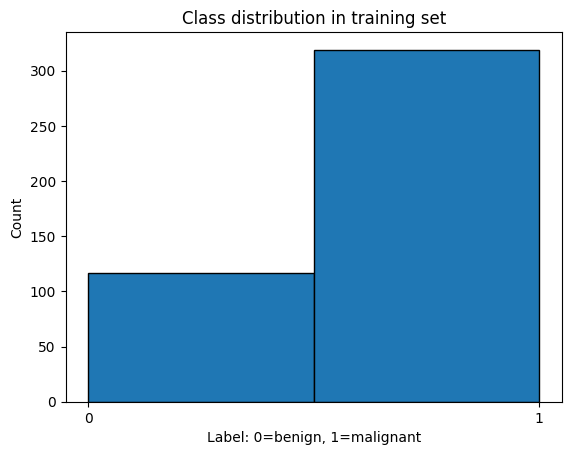

Benign: 117
Malignant: 319


In [ ]:
print("\n📊 Analyzing class distribution...")
print("=" * 70)

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=2, edgecolor="black", color=['#2ecc71', '#e74c3c'])
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.title("Class Distribution in Training Set", fontsize=14, fontweight='bold')
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

benign_count = (y_train==0).sum()
malignant_count = (y_train==1).sum()
total = len(y_train)

print(f"\n📈 Class Distribution:")
print(f"   Benign (0):    {benign_count:>4} samples ({benign_count/total*100:.1f}%)")
print(f"   Malignant (1): {malignant_count:>4} samples ({malignant_count/total*100:.1f}%)")
print(f"   Total:         {total:>4} samples")

if abs(benign_count - malignant_count) / total > 0.2:
    print("\n⚠️  Dataset is imbalanced! Consider using stratified sampling or class weights.")
else:
    print("\n✅ Dataset is reasonably balanced.")

In [ ]:
import random

print("\n🖼️  Sample Images from Training Set:")
print("=" * 70)

# Note: X_train is normalized, we need to use original images
X_train_original = train_ds.imgs

plt.figure(figsize=(12, 6))
for i in range(12):
    idx = random.randint(0, len(X_train_original)-1)
    plt.subplot(2, 6, i+1)
    plt.imshow(X_train_original[idx], cmap="gray")
    label_text = "Benign" if y_train[idx] == 0 else "Malignant"
    plt.title(f"{label_text}", fontsize=9)
    plt.axis("off")
plt.suptitle("Random Sample Images", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 🔢 Pixel Intensity Statistics

Understanding pixel value distributions helps us verify normalization and detect potential issues.

In [ ]:
print("\n📉 Pixel Intensity Statistics (After Normalization):")
print("=" * 70)
print(f"   Minimum:       {X_train.min():>8.4f}")
print(f"   Maximum:       {X_train.max():>8.4f}")
print(f"   Mean:          {X_train.mean():>8.4f}")
print(f"   Std Deviation: {X_train.std():>8.4f}")
print("\n💡 After StandardScaler, mean should be ~0 and std ~1")

Min pixel: -4.381680086346752
Max pixel: 7.6316358957483486
Mean pixel: 5.321420975548401e-18
Std pixel: 1.0


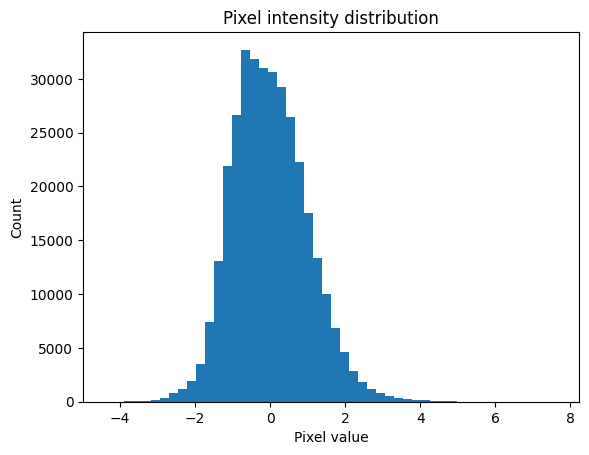

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(X_train.ravel(), bins=50, edgecolor='black', alpha=0.7)
plt.title("Pixel Intensity Distribution (Normalized)", fontsize=14, fontweight='bold')
plt.xlabel("Normalized Pixel Value")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 🔬 Compare Class-wise Intensity Differences

Sometimes malignant vs benign images differ subtly in their pixel intensities.

In [ ]:
benign = X_train[y_train == 0]
malignant = X_train[y_train == 1]

print("\n🔍 Mean Pixel Intensity by Class:")
print("=" * 70)
print(f"   Benign mean:    {benign.mean():>8.4f}")
print(f"   Malignant mean: {malignant.mean():>8.4f}")
print(f"   Difference:     {abs(benign.mean() - malignant.mean()):>8.4f}")

Benign mean: -0.12260432223754343
Malignant mean: 0.04496772947270401


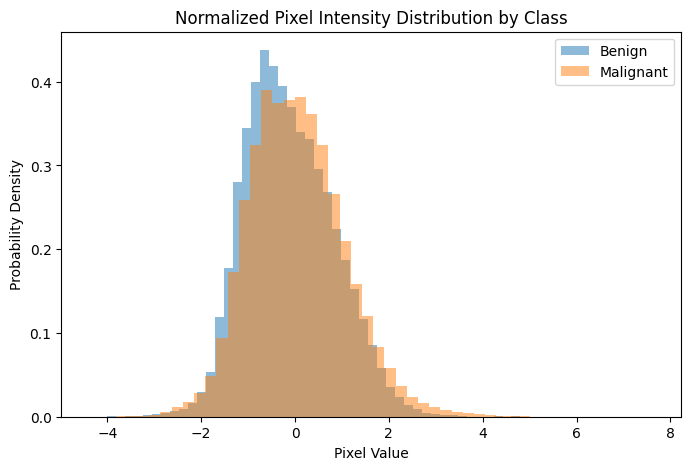

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(benign.ravel(), bins=50, alpha=0.6, label="Benign", density=True, color='#2ecc71')
plt.hist(malignant.ravel(), bins=50, alpha=0.6, label="Malignant", density=True, color='#e74c3c')

plt.legend()
plt.title("Normalized Pixel Intensity Distribution by Class", fontsize=14, fontweight='bold')
plt.xlabel("Normalized Pixel Value")
plt.ylabel("Probability Density")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

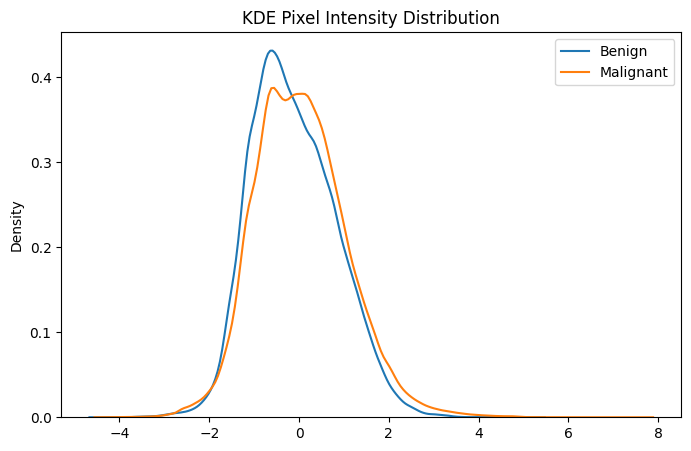

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(benign.ravel(), label="Benign", color='#2ecc71', linewidth=2)
sns.kdeplot(malignant.ravel(), label="Malignant", color='#e74c3c', linewidth=2)
plt.title("KDE Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Normalized Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 🎨 Check Image Similarity using PCA (2D Visualization)

Flatten images → reduce to 2 principal components → scatter plot to visualize class separability.

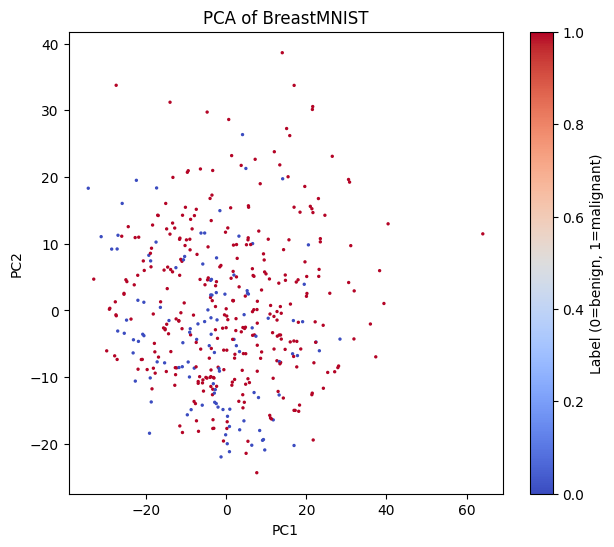

In [ ]:
from sklearn.decomposition import PCA

print("\n🎨 Performing PCA for 2D visualization...")
print("=" * 70)

X_flat = X_train.reshape(len(X_train), -1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

print(f"   Explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

plt.figure(figsize=(8, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="coolwarm", s=3, alpha=0.6)
plt.title("PCA of BreastMNIST (2D Projection)", fontsize=14, fontweight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.colorbar(scatter, label="Label (0=Benign, 1=Malignant)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ PCA visualization complete!")

### 📸 Average Images per Class

This visualization is extremely insightful for medical data - it shows the "typical" appearance of each class.

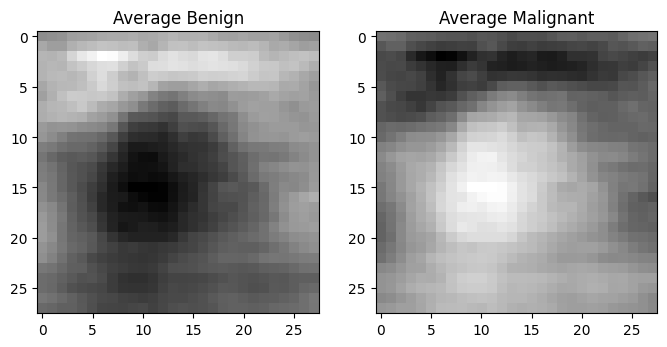

In [ ]:
print("\n📸 Computing average images per class...")
print("=" * 70)

avg_benign = benign.mean(axis=0)
avg_malignant = malignant.mean(axis=0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(avg_benign.reshape((28, 28)), cmap="gray")
plt.title("Average Benign Image", fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_malignant.reshape((28, 28)), cmap="gray")
plt.title("Average Malignant Image", fontsize=12, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Average images computed!")

### 🔍 Difference Map

Visualizing the difference between average malignant and benign images reveals key discriminative features.

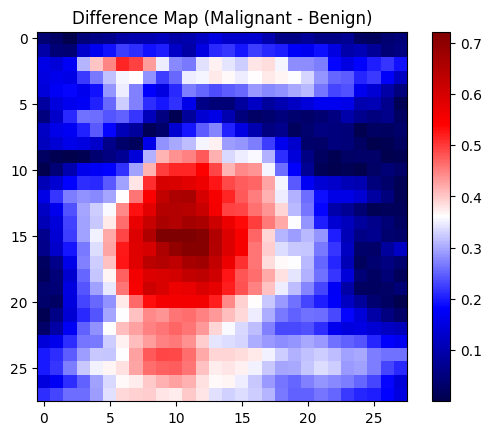

In [ ]:
plt.figure(figsize=(8, 6))
diff_map = abs(avg_malignant.reshape((28, 28)) - avg_benign.reshape((28, 28)))
plt.imshow(diff_map, cmap="seismic")
plt.title("Difference Map (|Malignant - Benign|)", fontsize=14, fontweight='bold')
plt.colorbar(label="Absolute Difference")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\n📊 Max difference: {diff_map.max():.4f}")
print(f"   Mean difference: {diff_map.mean():.4f}")

In [ ]:
import numpy as np
from scipy.stats import sem

print("\n📊 Computing confidence intervals...")
print("=" * 70)

# Means
mean_b = benign.mean(axis=0)
mean_m = malignant.mean(axis=0)

# Standard error
sem_b = sem(benign, axis=0)
sem_m = sem(malignant, axis=0)

# 95% CI
ci_low_b = mean_b - 1.96 * sem_b
ci_high_b = mean_b + 1.96 * sem_b

ci_low_m = mean_m - 1.96 * sem_m
ci_high_m = mean_m + 1.96 * sem_m

print("✅ Confidence intervals computed!")

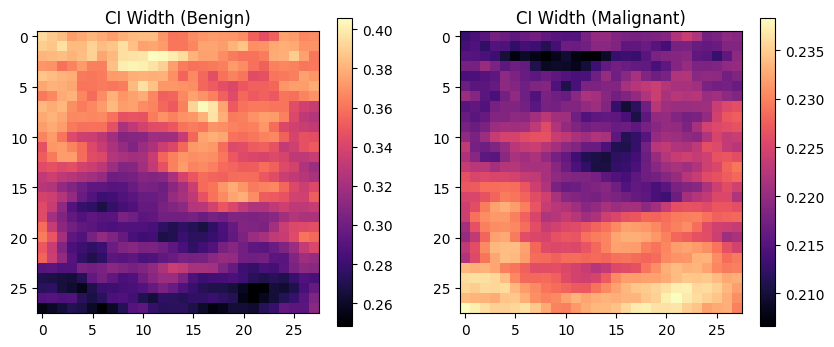

In [ ]:
ci_width_b = (ci_high_b - ci_low_b).reshape(28, 28)
ci_width_m = (ci_high_m - ci_low_m).reshape(28, 28)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(ci_width_b, cmap="magma")
plt.title("CI Width (Benign)", fontsize=12, fontweight='bold')
plt.colorbar(label="CI Width")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ci_width_m, cmap="magma")
plt.title("CI Width (Malignant)", fontsize=12, fontweight='bold')
plt.colorbar(label="CI Width")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n📈 CI Analysis:")
print(f"   Benign - Mean CI width:    {ci_width_b.mean():.4f}")
print(f"   Malignant - Mean CI width: {ci_width_m.mean():.4f}")

## 🤖 STEP 2: Model Training (50 minutes)

Now let's train multiple machine learning models and compare their performance!

### 📈 Model 1: Logistic Regression

A simple linear classifier - our baseline model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("\n🔄 Training Logistic Regression...")
print("=" * 70)

# Training + Time measurement
start = time.time()

logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)

train_time = time.time() - start

# Predictions
y_pred = logreg.predict(X_test)

# Metrics
logreg_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ Logistic Regression trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {logreg_results['accuracy']:.4f}")
print(f"   Precision: {logreg_results['precision']:.4f}")
print(f"   Recall:    {logreg_results['recall']:.4f}")
print(f"   F1-Score:  {logreg_results['f1_score']:.4f}")

{'accuracy': 0.7948717948717948, 'precision': 0.8660714285714286, 'recall': 0.8508771929824561, 'f1_score': 0.8584070796460177, 'train_time_sec': 0.10794353485107422}


### 🌲 Model 2: Random Forest

An ensemble of decision trees for more complex pattern recognition.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("\n🌲 Training Random Forest...")
print("=" * 70)

# Training + Time measurement
start = time.time()

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

train_time = time.time() - start

# Predictions
y_pred = rf.predict(X_test)

# Metrics
rf_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ Random Forest trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {rf_results['accuracy']:.4f}")
print(f"   Precision: {rf_results['precision']:.4f}")
print(f"   Recall:    {rf_results['recall']:.4f}")
print(f"   F1-Score:  {rf_results['f1_score']:.4f}")

{'accuracy': 0.8012820512820513, 'precision': 0.816793893129771, 'recall': 0.9385964912280702, 'f1_score': 0.8734693877551021, 'train_time_sec': 1.5647163391113281}


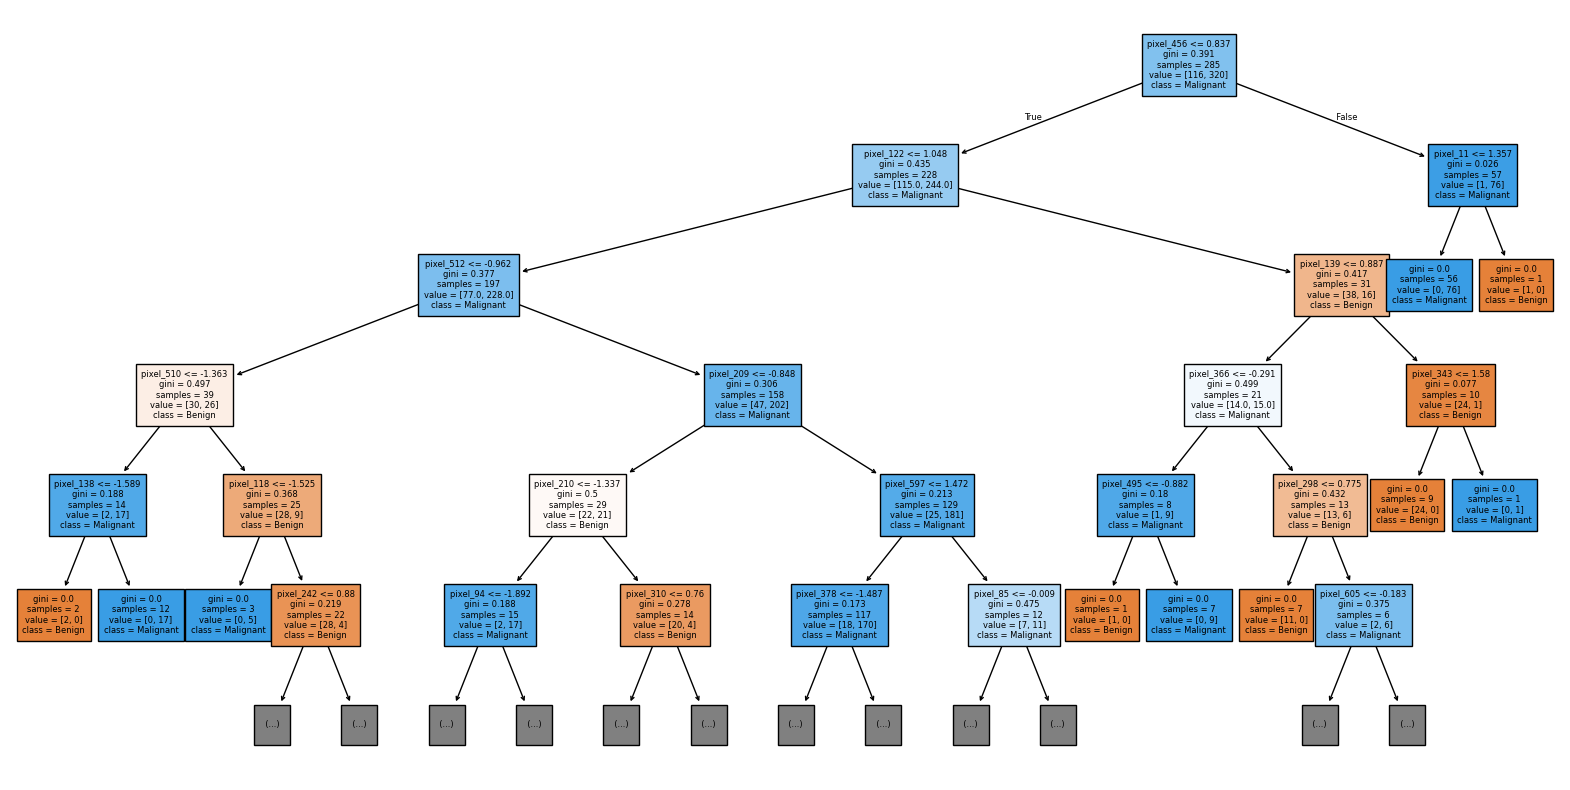

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("\n🌳 Visualizing first decision tree from Random Forest...")
print("=" * 70)

# Take the first decision tree from the Random Forest
estimator = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          filled=True,
          feature_names=[f"pixel_{i}" for i in range(X_train.shape[1])],
          class_names=["Benign", "Malignant"],
          max_depth=5,     
          fontsize=6)
plt.title("First Decision Tree (max_depth=5 for visualization)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Note: This is just one of 200 trees in the Random Forest!")

### 🚀 Model 3: XGBoost (Optional)

Gradient boosting for high performance - commented out for speed.

In [21]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     "max_depth": [3, 4, 5],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "n_estimators": [200, 400],
#     "subsample": [0.7, 0.9],
# }

# grid = GridSearchCV(
#     xgb.XGBClassifier(eval_metric="logloss"),
#     param_grid=params,
#     cv=3,
#     scoring="accuracy",
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# print("Beste Parameter:", grid.best_params_)
# print("Beste Accuracy:", grid.best_score_)


### 🎯 Model 4: Support Vector Machine (SVM)

A powerful classifier using the RBF kernel for non-linear decision boundaries.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n🎯 Training SVM with RBF kernel...")
print("=" * 70)

# Training + Time measurement
start = time.time()

svm = SVC(kernel="rbf", C=5, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

train_time = time.time() - start

# Predictions
y_pred = svm.predict(X_test)

# Metrics
svm_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ SVM trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {svm_results['accuracy']:.4f}")
print(f"   Precision: {svm_results['precision']:.4f}")
print(f"   Recall:    {svm_results['recall']:.4f}")
print(f"   F1-Score:  {svm_results['f1_score']:.4f}")

{'accuracy': 0.8076923076923077, 'precision': 0.8559322033898306, 'recall': 0.8859649122807017, 'f1_score': 0.8706896551724138, 'train_time_sec': 0.06939458847045898}


### 👥 Model 5: K-Nearest Neighbors (KNN)

Instance-based learning - classifies based on similarity to training samples.

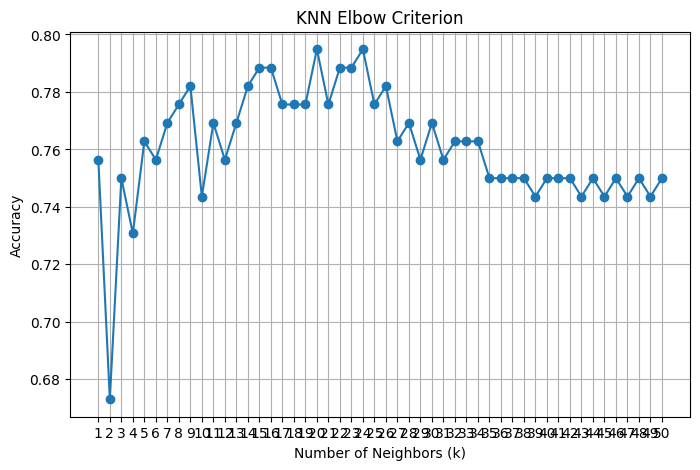

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("\n🔍 Finding optimal K for KNN...")
print("=" * 70)

k_values = range(1, 51)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

best_k = k_values[accuracies.index(max(accuracies))]
print(f"\n✅ Best K: {best_k} with accuracy: {max(accuracies):.4f}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker="o", linewidth=2)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K={best_k}')
plt.xlabel("Number of Neighbors (K)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("KNN Elbow Criterion - Finding Optimal K", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print(f"\n👥 Training KNN with k={best_k}...")
print("=" * 70)

start = time.time()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

train_time = time.time() - start

y_pred = knn.predict(X_test)

knn_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ KNN trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {knn_results['accuracy']:.4f}")
print(f"   Precision: {knn_results['precision']:.4f}")
print(f"   Recall:    {knn_results['recall']:.4f}")
print(f"   F1-Score:  {knn_results['f1_score']:.4f}")

KNN Accuracy: 0.7948717948717948


### 📊 Model 6: Naive Bayes

A probabilistic classifier based on Bayes' theorem with Gaussian distribution assumption.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n📊 Training Naive Bayes (Gaussian)...")
print("=" * 70)

# Training + Time measurement
start = time.time()

nb = GaussianNB()
nb.fit(X_train, y_train)

train_time = time.time() - start

# Predictions
y_pred = nb.predict(X_test)

# Metrics
nb_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ Naive Bayes trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {nb_results['accuracy']:.4f}")
print(f"   Precision: {nb_results['precision']:.4f}")
print(f"   Recall:    {nb_results['recall']:.4f}")
print(f"   F1-Score:  {nb_results['f1_score']:.4f}")

{'accuracy': 0.6025641025641025, 'precision': 0.8170731707317073, 'recall': 0.5877192982456141, 'f1_score': 0.6836734693877551, 'train_time_sec': 0.0049896240234375}


### 🔬 Model 7: PCA + SVM

Dimensionality reduction with PCA before SVM classification to reduce computational cost.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("\n🔬 Training PCA + SVM...")
print("=" * 70)

# PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"   Reduced from {X_train.shape[1]} to {X_train_pca.shape[1]} features")
print(f"   Explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Training + Time measurement
start = time.time()

svm_pca = SVC(kernel="rbf", C=5, gamma="scale", random_state=42)
svm_pca.fit(X_train_pca, y_train)

train_time = time.time() - start

# Predictions
y_pred = svm_pca.predict(X_test_pca)

# Metrics
svm_pca_results = {
    "accuracy":  accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall":    recall_score(y_test, y_pred),
    "f1_score":  f1_score(y_test, y_pred),
    "train_time_sec": train_time
}

print(f"\n✅ PCA + SVM trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {svm_pca_results['accuracy']:.4f}")
print(f"   Precision: {svm_pca_results['precision']:.4f}")
print(f"   Recall:    {svm_pca_results['recall']:.4f}")
print(f"   F1-Score:  {svm_pca_results['f1_score']:.4f}")

{'accuracy': 0.7628205128205128, 'precision': 0.8130081300813008, 'recall': 0.8771929824561403, 'f1_score': 0.8438818565400844, 'train_time_sec': 0.021268844604492188}


### 🧠 Model 8: Convolutional Neural Network (CNN)

Deep learning approach - CNNs are specifically designed for image data!

In [ ]:
import numpy as np
from medmnist import BreastMNIST
from sklearn.model_selection import train_test_split

print("\n🖼️  Preparing data for CNN...")
print("=" * 70)

# Load datasets
train_ds = BreastMNIST(split='train', download=True)
test_ds  = BreastMNIST(split='test',  download=True)

# Images as float32 + normalization to [0,1]
X_full = train_ds.imgs.astype("float32") / 255.0
y_full = train_ds.labels.flatten().astype("int32")

X_test_cnn = test_ds.imgs.astype("float32") / 255.0
y_test_cnn = test_ds.labels.flatten().astype("int32")

# Add channel dimension → (N, 28, 28, 1)
X_full     = X_full[..., np.newaxis]
X_test_cnn = X_test_cnn[..., np.newaxis]

print(f"   Full train shape: {X_full.shape}")
print(f"   Test shape: {X_test_cnn.shape}")

# Create train/validation split
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

print(f"\n✅ Data prepared for CNN")
print(f"   Training:   {X_train_cnn.shape[0]} samples")
print(f"   Validation: {X_val_cnn.shape[0]} samples")
print(f"   Test:       {X_test_cnn.shape[0]} samples")

Full train shape: (546, 28, 28, 1)
Test shape: (156, 28, 28, 1)
Train: (436, 28, 28, 1) Val: (110, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import AUC

print("\n🏗️  Building CNN architecture...")
print("=" * 70)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # 1 output neuron for binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

print("\n✅ CNN architecture built!")
print("\n📐 Model Architecture:")
model.summary()

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "best_cnn_breastmnist.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

print("\n💡 Using Early Stopping (patience=5) and Model Checkpointing")

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n🚀 Training CNN...")
print("=" * 70)

# Training + Time measurement
start = time.time()

history = model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

train_time = time.time() - start

# Evaluation
y_prob = model.predict(X_test_cnn, verbose=0)
y_pred = (y_prob > 0.5).astype(int).flatten()

cnn_results = {
    "accuracy":        accuracy_score(y_test_cnn, y_pred),
    "precision":       precision_score(y_test_cnn, y_pred),
    "recall":          recall_score(y_test_cnn, y_pred),
    "f1_score":        f1_score(y_test_cnn, y_pred),
    "train_time_sec":  train_time
}

print(f"\n✅ CNN trained in {train_time:.2f} seconds")
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {cnn_results['accuracy']:.4f}")
print(f"   Precision: {cnn_results['precision']:.4f}")
print(f"   Recall:    {cnn_results['recall']:.4f}")
print(f"   F1-Score:  {cnn_results['f1_score']:.4f}")

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6697 - auc: 0.5113 - loss: 0.6205 - val_accuracy: 0.7273 - val_auc: 0.6704 - val_loss: 0.5744
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7317 - auc: 0.5869 - loss: 0.5722 - val_accuracy: 0.7273 - val_auc: 0.7069 - val_loss: 0.5617
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7317 - auc: 0.6012 - loss: 0.5690 - val_accuracy: 0.7273 - val_auc: 0.7338 - val_loss: 0.5469
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7317 - auc: 0.6639 - loss: 0.5503 - val_accuracy: 0.7273 - val_auc: 0.7579 - val_loss: 0.5345
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7317 - auc: 0.6873 - loss: 0.5405 - val_accuracy: 0.7273 - val_auc: 0.7698 - val_loss: 0.5207
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7339 - auc: 0.7037 - loss: 0.5364 - val_accuracy: 0.7273 - val_auc: 0.7802 - val_loss: 0.5074
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accura

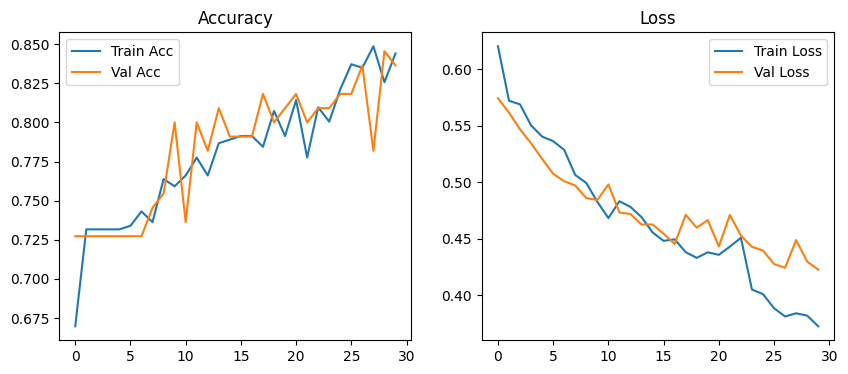

In [ ]:
import matplotlib.pyplot as plt

print("\n📈 Visualizing training history...")
print("=" * 70)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Acc', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Acc', linewidth=2)
plt.title("Accuracy over Epochs", fontsize=12, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.title("Loss over Epochs", fontsize=12, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUC', linewidth=2)
plt.plot(history.history['val_auc'], label='Val AUC', linewidth=2)
plt.title("AUC over Epochs", fontsize=12, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Training visualization complete!")

## 📊 STEP 3: Model Comparison & Results (20 minutes)

Let's compare all models side by side!

In [ ]:
import pandas as pd

print("\n📊 Compiling all model results...")
print("=" * 70)

# Collect all results
all_results = {
    "Logistic Regression": logreg_results,
    "Random Forest": rf_results,
    "SVM": svm_results,
    "Naive Bayes": nb_results,
    "KNN": knn_results,
    "SVM + PCA": svm_pca_results,
    "CNN": cnn_results
}

# Create DataFrame
results_df = pd.DataFrame(all_results).T   # .T = Transpose, so models are rows
results_df = results_df.round(4)

# Sort by F1-Score
results_df = results_df.sort_values('f1_score', ascending=False)

print("\n✅ Results compiled!\n")
print("=" * 70)
print("📈 MODEL COMPARISON TABLE")
print("=" * 70)

display(results_df)

# Find best model
best_model = results_df.index[0]
best_f1 = results_df.loc[best_model, 'f1_score']

print("\n" + "=" * 70)
print(f"🏆 BEST MODEL: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")
print("=" * 70)

,accuracy,precision,recall,f1_score,train_time_sec
Logistic Regression,0.794872,0.866071,0.850877,0.858407,0.107944
Random Forest,0.801282,0.816794,0.938596,0.873469,1.564716
SVM (RBF),0.807692,0.855932,0.885965,0.870690,0.069395
Naive Bayes (Gaussian),0.602564,0.817073,0.587719,0.683673,0.004990
SVM + PCA,0.762821,0.813008,0.877193,0.843882,0.021269
CNN,0.820513,0.825758,0.956140,0.886179,11.869574


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Visualizing model comparison...")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy comparison
axes[0, 0].barh(results_df.index, results_df['accuracy'], color='#3498db')
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: F1-Score comparison
axes[0, 1].barh(results_df.index, results_df['f1_score'], color='#2ecc71')
axes[0, 1].set_xlabel('F1-Score', fontsize=11)
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Training time comparison
axes[1, 0].barh(results_df.index, results_df['train_time_sec'], color='#e74c3c')
axes[1, 0].set_xlabel('Training Time (seconds)', fontsize=11)
axes[1, 0].set_title('Model Training Time Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Precision vs Recall
axes[1, 1].scatter(results_df['recall'], results_df['precision'], s=200, alpha=0.7, color='#9b59b6')
for idx, model in enumerate(results_df.index):
    axes[1, 1].annotate(model, 
                        (results_df.loc[model, 'recall'], results_df.loc[model, 'precision']),
                        fontsize=8, ha='right')
axes[1, 1].set_xlabel('Recall', fontsize=11)
axes[1, 1].set_ylabel('Precision', fontsize=11)
axes[1, 1].set_title('Precision vs Recall', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")

In [ ]:
## 🎓 Summary & Key Takeaways

### 📝 What We Learned

1. **Data Exploration**: Medical images can be analyzed using statistical methods (PCA, class averages, confidence intervals)
2. **Traditional ML**: Models like Random Forest and SVM work well even on flattened images
3. **Deep Learning**: CNNs are specifically designed for images and often achieve superior performance
4. **Trade-offs**: Consider accuracy vs training time vs model complexity

### 🔑 Key Insights

- **Best Performance**: Check the results table above to see which model performed best
- **Training Speed**: Traditional ML models (LogReg, NB) train much faster than CNNs
- **Feature Engineering**: PCA can reduce dimensions while maintaining performance
- **Medical Context**: High recall is often more important than precision in cancer detection

### 🚀 Next Steps

- Try hyperparameter tuning (GridSearchCV)
- Experiment with data augmentation for CNN
- Test on different medical imaging datasets
- Implement ensemble methods combining multiple models

---

**🎉 Congratulations! You've completed the medical image classification workshop!**